# 手动实现经典NLP模型算法——RNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.ptb import load_data
from rnn.simple_rnnlm import SimpleRnnlm
from common.optimizer import SGD

## Ⅰ、加载PTB语料数据集

In [3]:
corpus, word_to_id, id_to_word = load_data("train")
corpus_size = 1000  # 仅加载前1000单词
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)

xs = corpus[:-1]
ts = corpus[1:]
data_size = len(xs)
'corpus size: %d, vocabulary size: %d' % (corpus_size, vocab_size)

'corpus size: 1000, vocabulary size: 418'

## Ⅱ、创建RNN语言模型

In [4]:
# 定义超参数
batch_size = 10
wordvec_size = 100
hidden_size = 100
time_size = 5  # Truncated BPTT的时间步大小
lr = 0.1
max_epoch = 100

In [5]:
# 训练过程中的参数
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

In [6]:
# 定义模型
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)

## Ⅲ、模型训练

In [7]:
# 计算读入 mini-batch 的各笔样本数据的开始位置
jump = (corpus_size - 1) // batch_size
offsets = [i * jump for i in range(batch_size)]

In [8]:
for epoch in range(max_epoch):
  for iter in range(max_iters):
    batch_x = np.empty((batch_size, time_size), dtype='i')
    batch_t = np.empty((batch_size, time_size), dtype='i')
    for t in range(time_size):
        for i, offset in enumerate(offsets):
          batch_x[i, t] = xs[(offset + time_idx) % data_size]
          batch_t[i, t] = ts[(offset + time_idx) % data_size]
        time_idx += 1

    loss = model.forward(batch_x, batch_t)
    model.backward()
    optimizer.update(model.params, model.grads)
    total_loss += loss
    loss_count += 1

  # 困惑度评估
  ppl = np.exp(total_loss / loss_count)
  print('| epoch %d | perplexity %.2f' % (epoch+1, ppl))
  ppl_list.append(float(ppl))
  total_loss, loss_count = 0, 0

/content/drive/MyDrive/nlp_demo/rnn/rnn_layers.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  hs[:, t, :] = self.h
/content/drive/MyDrive/nlp_demo/rnn/rnn_layers.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
  self.grads[0][...] = dWx
/content/drive/MyDrive/nlp_demo/rnn/rnn_layers.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  self.grads[1][...] = dWh
/content/drive/MyDrive/nlp_demo/rnn/rnn_layers.py:36: ComplexWarning: Casting complex values to real discards the imaginary part
  self.grads[2][...] = db
/content/drive/MyDrive/nlp_demo/rnn/rnn_layers.py:89: ComplexWarning: Casting complex values to real discards the imaginary part
  dxs[: ,t, :] = dx


| epoch 1 | perplexity 381.64
| epoch 2 | perplexity 255.45
| epoch 3 | perplexity 221.71
| epoch 4 | perplexity 214.75
| epoch 5 | perplexity 205.52
| epoch 6 | perplexity 201.57
| epoch 7 | perplexity 198.54
| epoch 8 | perplexity 195.63
| epoch 9 | perplexity 191.14
| epoch 10 | perplexity 192.64
| epoch 11 | perplexity 188.41
| epoch 12 | perplexity 192.34
| epoch 13 | perplexity 190.29
| epoch 14 | perplexity 190.21
| epoch 15 | perplexity 189.34
| epoch 16 | perplexity 185.93
| epoch 17 | perplexity 183.70
| epoch 18 | perplexity 180.16
| epoch 19 | perplexity 181.10
| epoch 20 | perplexity 182.26
| epoch 21 | perplexity 180.56
| epoch 22 | perplexity 176.93
| epoch 23 | perplexity 172.64
| epoch 24 | perplexity 173.57
| epoch 25 | perplexity 174.62
| epoch 26 | perplexity 174.11
| epoch 27 | perplexity 168.25
| epoch 28 | perplexity 164.59
| epoch 29 | perplexity 163.24
| epoch 30 | perplexity 157.07
| epoch 31 | perplexity 158.56
| epoch 32 | perplexity 153.70
| epoch 33 | perp

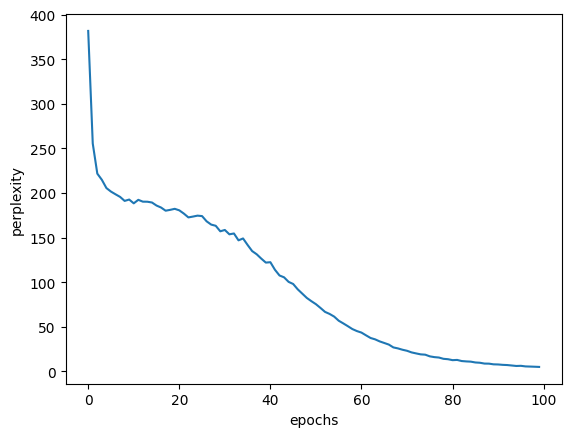

In [9]:

# 绘制训练过程图像
x = np.arange(len(ppl_list))
plt.plot(x, ppl_list, label='train')
plt.xlabel('epochs')
plt.ylabel('perplexity')
plt.show()